#**ANALYSE DES SENTIMENTS DE LA PLATEFORME RIPPLING**

In [ ]:
# Importation des modules
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

**IMPORTATIONS DES PATHS DE MES DATASETS**

In [ ]:
# Voir la liste de tous nos fichier
directory = '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets'
files = glob.glob(directory + '/*')
files

['/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/deel_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oyster_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oyster_getapps.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/deel_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oysterhr_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/rippling_truspilot.csv']

## **Data Cleaning et Traitement des données de la plateforme rippling**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Voir notre datasets
df = pd.read_csv('/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/rippling_truspilot.csv')
df.head()

,Plateforme,Utilisateur,Nombre de commentaires,Position Géographique,Date,Avis,Notes sur 5
0,rippling.com,Steven Jones,1 review,US,6 days ago,Poor Customer Support AI - Great Person Suppor...,3
1,rippling.com,JH,1 review,US,"Jan 5, 2024",I am having trouble signing upI am having trou...,1
2,rippling.com,Lacey Taub,1 review,US,"Oct 25, 2022Invited",Rippling makes my daily work day easierRipplin...,5
3,rippling.com,Sohail S,1 review,US,"Oct 29, 2022Invited","Rippling, Payroll, PEO and Devices and moreWe ...",5
4,rippling.com,Oscar Rivas,1 review,US,"Oct 14, 2022Invited",Choosing a health plan can be easyChoosing a h...,5


In [ ]:
# Supprimer les colonnes inutiles
df = df.drop(columns = ['Utilisateur', 'Nombre de commentaires', 'Position Géographique', 'Date'], axis = 0)
df.head()

,Plateforme,Avis,Notes sur 5
0,rippling.com,Poor Customer Support AI - Great Person Suppor...,3
1,rippling.com,I am having trouble signing upI am having trou...,1
2,rippling.com,Rippling makes my daily work day easierRipplin...,5
3,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5
4,rippling.com,Choosing a health plan can be easyChoosing a h...,5


In [ ]:
# Voir la dimension de notre dataframe
df.shape

(1017, 3)

In [ ]:
# Voir les informations des données dans notre datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Plateforme   1017 non-null   object
 1   Avis         1017 non-null   object
 2   Notes sur 5  1017 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ KB


In [ ]:
# Assurez-vous d'avoir importé pandas
import pandas as pd

# Supposez que votre DataFrame est nommé df et qu'il est déjà nettoyé
# Par exemple, vous avez un DataFrame nettoyé comme suit :
# df = ...

# Spécifiez le chemin où vous souhaitez enregistrer le fichier CSV
chemin_du_fichier = "/content/drive/MyDrive/TALENT VIRTUEL/DATA CLEANING/rippling_nettoye.csv"

# Enregistrez le DataFrame dans un fichier CSV
df.to_csv(chemin_du_fichier, index=False)  # Si vous ne voulez pas inclure l'index dans le fichier CSV


**Simple Analyse des Scores**

<Axes: title={'center': 'Histogramme des avis'}, xlabel='Notes sur 5'>

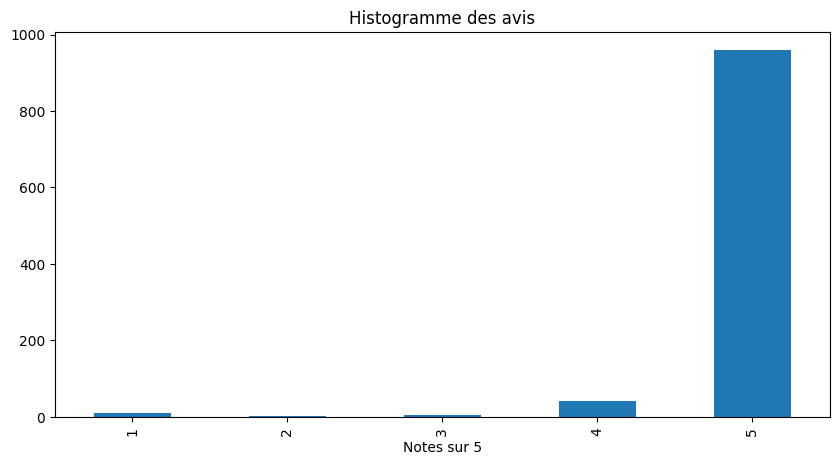

In [ ]:
df['Notes sur 5'].value_counts().sort_index().plot(kind='bar', title = "Histogramme des avis",
                                                   xlabel = "Notes sur 5",
                                                   figsize=(10, 5))

**Importation de la bibliothèque NLTK**:

In [ ]:
# Importation des modules
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**UTILISATION DE VADER POUR LA GESTION DES SCORES DES SENTIMENTS (POSITIVE | NEGATIVE | NEUTRE)**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [ ]:
# Instancier l'analyseur des sentiments
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
exemple = df['Avis'][23]

In [ ]:
# Voir pour notre exemple les scores des polarités
sia.polarity_scores(exemple)

{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.9588}

In [ ]:
df.index

RangeIndex(start=0, stop=1017, step=1)

In [ ]:
len(df)

1017

In [ ]:
# Créer une liste de valeurs pour la colonne ID
id_values = ['RIPPLING' + str(i) for i in range(1, len(df) + 1)]

# Ajouter la colonne ID au DataFrame
df['ID'] = id_values


In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5,ID
0,rippling.com,Poor Customer Support AI - Great Person Suppor...,3,RIPPLING1
1,rippling.com,I am having trouble signing upI am having trou...,1,RIPPLING2
2,rippling.com,Rippling makes my daily work day easierRipplin...,5,RIPPLING3
3,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5,RIPPLING4
4,rippling.com,Choosing a health plan can be easyChoosing a h...,5,RIPPLING5


In [ ]:
# Passer à l'analyse des scores des polarités pour tout le datasets
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Avis']
  myid = row['ID']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/1017 [00:00<?, ?it/s]

In [ ]:
# Voir le résultats
res

{'RIPPLING1': {'neg': 0.153, 'neu': 0.535, 'pos': 0.312, 'compound': 0.8972},
 'RIPPLING2': {'neg': 0.15, 'neu': 0.828, 'pos': 0.022, 'compound': -0.7579},
 'RIPPLING3': {'neg': 0.058, 'neu': 0.838, 'pos': 0.104, 'compound': 0.6696},
 'RIPPLING4': {'neg': 0.0, 'neu': 0.975, 'pos': 0.025, 'compound': 0.3182},
 'RIPPLING5': {'neg': 0.03, 'neu': 0.777, 'pos': 0.193, 'compound': 0.9753},
 'RIPPLING6': {'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.875},
 'RIPPLING7': {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.9407},
 'RIPPLING8': {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9764},
 'RIPPLING9': {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.9138},
 'RIPPLING10': {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.8807},
 'RIPPLING11': {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9623},
 'RIPPLING12': {'neg': 0.036, 'neu': 0.734, 'pos': 0.23, 'compound': 0.9592},
 'RIPPLING13': {'neg': 0.04, 'neu': 0.708, 'pos': 0.251, 'compound': 0.9812},


In [ ]:
# Transformer ça en dataframe pour bien le manipuler
df_vader = pd.DataFrame(res).T
df_vader = df_vader.reset_index().rename(columns={'index':'ID'})
df_vader = df_vader.merge(df, how='left')

In [ ]:
df_vader.head()

,ID,neg,neu,pos,compound,Plateforme,Avis,Notes sur 5
0,RIPPLING1,0.153,0.535,0.312,0.8972,rippling.com,Poor Customer Support AI - Great Person Suppor...,3
1,RIPPLING2,0.150,0.828,0.022,-0.7579,rippling.com,I am having trouble signing upI am having trou...,1
2,RIPPLING3,0.058,0.838,0.104,0.6696,rippling.com,Rippling makes my daily work day easierRipplin...,5
3,RIPPLING4,0.000,0.975,0.025,0.3182,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5
4,RIPPLING5,0.030,0.777,0.193,0.9753,rippling.com,Choosing a health plan can be easyChoosing a h...,5


**Affichage des graphiques du Vaders**

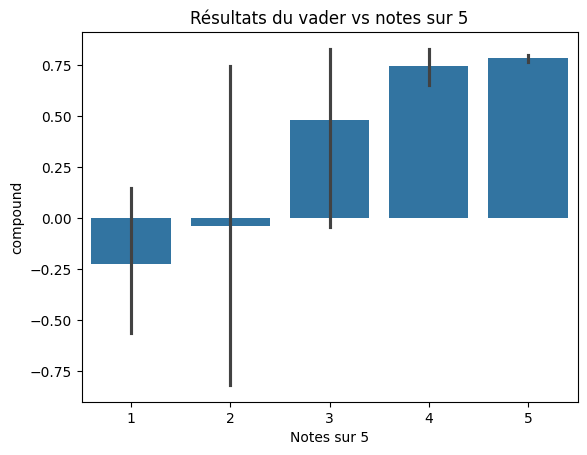

In [ ]:
ax = sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'compound')
ax.set_title("Résultats du vader vs notes sur 5")
plt.show()

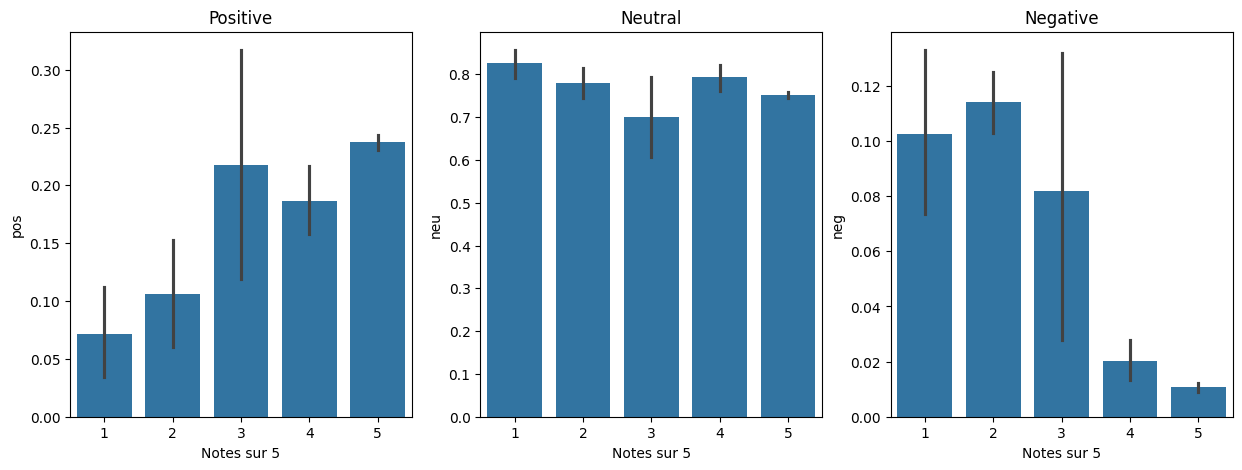

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data = df_vader, x ='Notes sur 5', y = 'pos',  ax = axs[0])
sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'neu', ax = axs[1])
sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

#Pré-entrainement du modèle

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# Utilisation d'un modèle pré-entrainé
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# Voir le score des textes  avec notre VADER
print(exemple)

sia.polarity_scores(text)

Foolproof user experience!The website is really easy to use, easy on the eyes, simple and straightforward. It uses language that's easy to understand. Easily navigable. I had to change some benefits for my insurance and even using the FAQ was very simple and straightforward. I got the answers I needed and the steps to make the changes were foolproof. Makes other systems look antiquated.Date of experience: October 25, 2022


{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.8436}

In [ ]:
print(exemple)

Foolproof user experience!The website is really easy to use, easy on the eyes, simple and straightforward. It uses language that's easy to understand. Easily navigable. I had to change some benefits for my insurance and even using the FAQ was very simple and straightforward. I got the answers I needed and the steps to make the changes were foolproof. Makes other systems look antiquated.Date of experience: October 25, 2022


In [ ]:
# Exécuter notre modèle de NLP basé sur Roberta Model
encoded_text = tokenizer(exemple, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
scores_dict

{'roberta_neg': 0.018599983,
 'roberta_neu': 0.10061629,
 'roberta_pos': 0.88078374}

In [ ]:
# Utilisationn du modèle sur notre datasests
def polarity_scores_roberta(exemple):
    encoded_text = tokenizer(exemple, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [ ]:
# Passer à l'analyse des scores des polarités pour tout le datasets
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
 try:
      text = row['Avis']
      myid = row['ID']
      vader_result = sia.polarity_scores(text)
      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
      robertar_result = polarity_scores_roberta(text)

      robertar_result = polarity_scores_roberta(text)
      both = {**vader_result, **robertar_result}
      res[myid] = both
 except RuntimeError:
      print(f'Stoppé pour le numéro {myid}')


  0%|          | 0/1017 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'ID'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Notes sur 5
0,RIPPLING1,0.153,0.535,0.312,0.8972,0.778686,0.175645,0.045668,rippling.com,Poor Customer Support AI - Great Person Suppor...,3
1,RIPPLING2,0.150,0.828,0.022,-0.7579,0.890305,0.100368,0.009327,rippling.com,I am having trouble signing upI am having trou...,1
2,RIPPLING3,0.058,0.838,0.104,0.6696,0.005610,0.045645,0.948745,rippling.com,Rippling makes my daily work day easierRipplin...,5
3,RIPPLING4,0.000,0.975,0.025,0.3182,0.001540,0.032764,0.965697,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5
4,RIPPLING5,0.030,0.777,0.193,0.9753,0.017634,0.085502,0.896864,rippling.com,Choosing a health plan can be easyChoosing a h...,5
...,...,...,...,...,...,...,...,...,...,...,...
1012,RIPPLING1013,0.000,0.873,0.127,0.7003,0.006928,0.192078,0.800993,rippling.com,Rippling has really streamlined all the…Rippli...,5
1013,RIPPLING1014,0.000,0.896,0.104,0.6901,0.002227,0.052640,0.945132,rippling.com,Rippling makes navigating HR concerns simple.R...,5
1014,RIPPLING1015,0.000,0.768,0.232,0.8154,0.001022,0.017831,0.981147,rippling.com,Easy to navigateRippling has made onboarding w...,5
1015,RIPPLING1016,0.000,1.000,0.000,0.0000,0.018094,0.949942,0.031965,rippling.com,This is a Rippling employee testDate of experi...,5


###**Comparer les deux modèles**

In [ ]:
results_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Plateforme', 'Avis', 'Notes sur 5'],
      dtype='object')

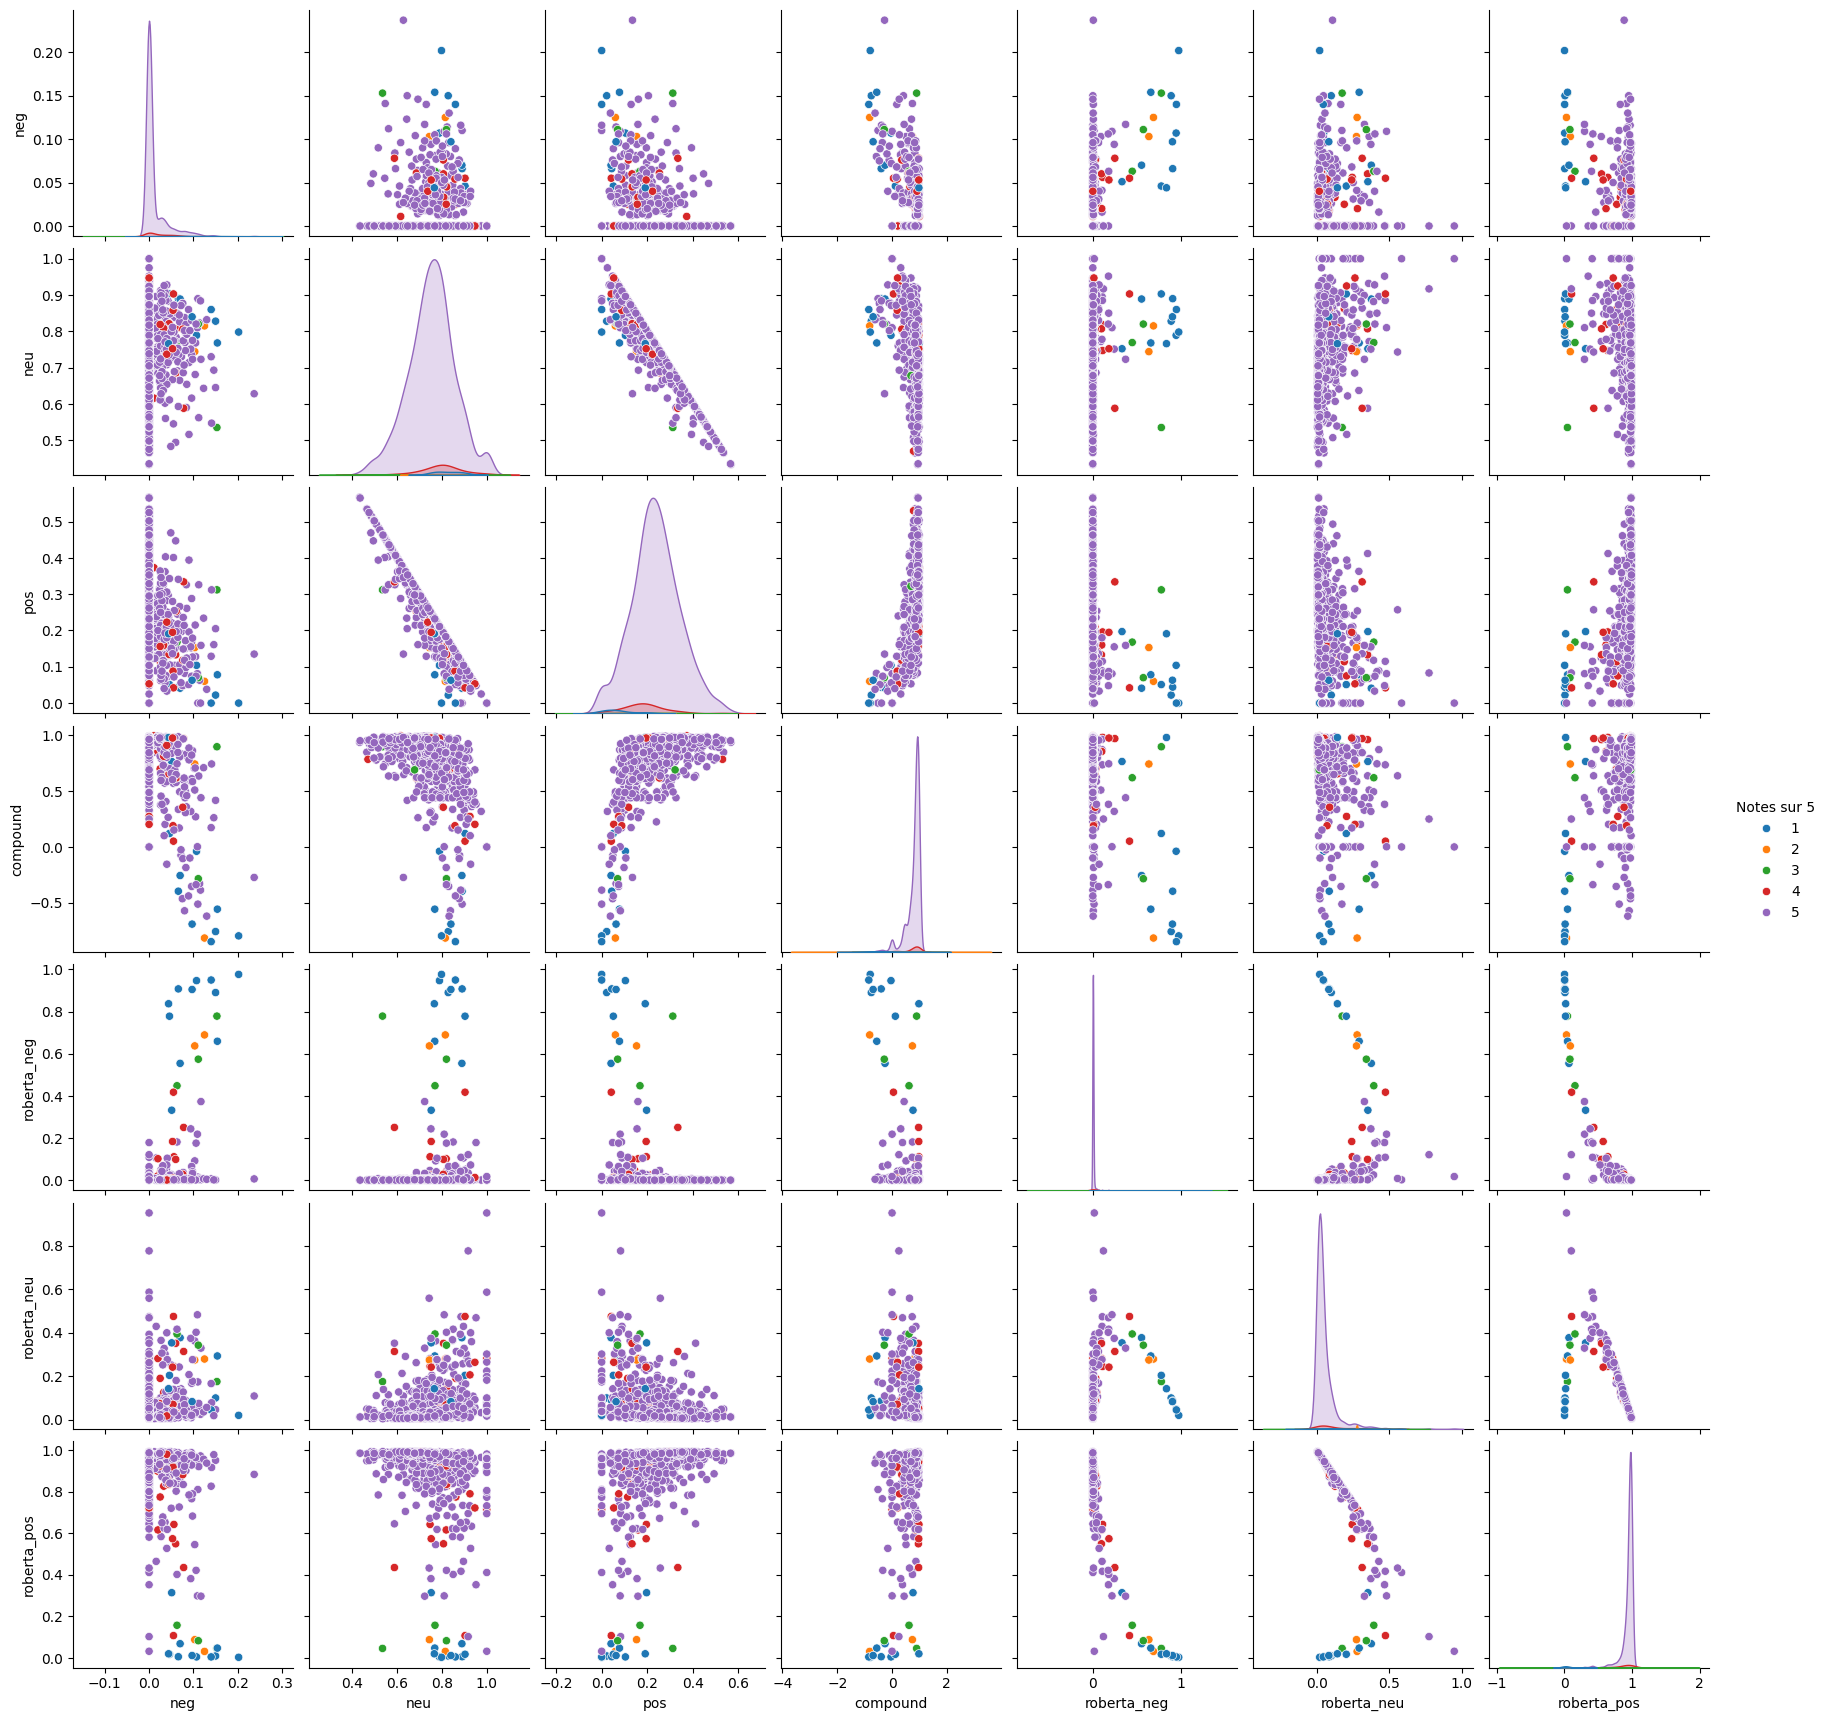

In [ ]:
sns.pairplot(data = results_df, vars = ['neg', 'neu', 'pos', 'compound',
                                       'roberta_neg', 'roberta_neu',
                                       'roberta_pos'],
             hue='Notes sur 5',
             palette = 'tab10')
plt.show()

In [ ]:
# Tester notre modèles sur nos données
results_df.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Notes sur 5
0,RIPPLING1,0.153,0.535,0.312,0.8972,0.778686,0.175645,0.045668,rippling.com,Poor Customer Support AI - Great Person Suppor...,3
1,RIPPLING2,0.150,0.828,0.022,-0.7579,0.890305,0.100368,0.009327,rippling.com,I am having trouble signing upI am having trou...,1
2,RIPPLING3,0.058,0.838,0.104,0.6696,0.005610,0.045645,0.948745,rippling.com,Rippling makes my daily work day easierRipplin...,5
3,RIPPLING4,0.000,0.975,0.025,0.3182,0.001540,0.032764,0.965697,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5
4,RIPPLING5,0.030,0.777,0.193,0.9753,0.017634,0.085502,0.896864,rippling.com,Choosing a health plan can be easyChoosing a h...,5


In [ ]:
# Renommons la dernière colonne
results_df = results_df.rename(columns={'Notes sur 5' : 'Scores'})
results_df.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores
0,RIPPLING1,0.153,0.535,0.312,0.8972,0.778686,0.175645,0.045668,rippling.com,Poor Customer Support AI - Great Person Suppor...,3
1,RIPPLING2,0.150,0.828,0.022,-0.7579,0.890305,0.100368,0.009327,rippling.com,I am having trouble signing upI am having trou...,1
2,RIPPLING3,0.058,0.838,0.104,0.6696,0.005610,0.045645,0.948745,rippling.com,Rippling makes my daily work day easierRipplin...,5
3,RIPPLING4,0.000,0.975,0.025,0.3182,0.001540,0.032764,0.965697,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5
4,RIPPLING5,0.030,0.777,0.193,0.9753,0.017634,0.085502,0.896864,rippling.com,Choosing a health plan can be easyChoosing a h...,5


In [ ]:
# Vérification de la reponses avec Robertar
results_df.query('Scores == 4').sort_values('roberta_pos', ascending = False)['Avis'].values[3]

'Simple and Easy to Use!Overall, Rippling is simple and easy to use! I have been using Rippling through my employer for about 8 months now and have had a great experience so far. Submitting my PTO requests and daily time cards have been simple and straight forward. The platform is user-friendly and organized.Date of experience: November 01, 2022'

In [ ]:
# Vérification de la reponses avec Vader
results_df.query('Scores == 4').sort_values('pos', ascending = False)['Avis'].values[3]

"Clean, modern user experienceBenefit elections isn't necessarily my idea of a good time, but the Rippling system is intuitive, nicely designed, and makes the process easy.  And I like that there's a modern, easy to use mobile app for managing my account.Date of experience: June 11, 2022"

In [ ]:
results_df.query('Scores == 5').sort_values('roberta_pos', ascending = False)['Avis'].values[1]

'I love RipplingI love Rippling! We recently started using it as a company and it’s been such an easy use!Date of experience: November 11, 2022'

In [ ]:
results_df.query('Scores == 5').sort_values('pos', ascending = False)['Avis'].values[13]

'Great experienceGreat experience. Super easy to use and clearDate of experience: July 14, 2022'

In [ ]:
results_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Plateforme', 'Avis', 'Scores'],
      dtype='object')

**METTRE AU CLAIR LE DATASETS**

In [ ]:
df = results_df.drop(columns = ['neg', 'neu', 'pos', 'compound'], axis = 1)
df.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores
0,RIPPLING1,0.778686,0.175645,0.045668,rippling.com,Poor Customer Support AI - Great Person Suppor...,3
1,RIPPLING2,0.890305,0.100368,0.009327,rippling.com,I am having trouble signing upI am having trou...,1
2,RIPPLING3,0.005610,0.045645,0.948745,rippling.com,Rippling makes my daily work day easierRipplin...,5
3,RIPPLING4,0.001540,0.032764,0.965697,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5
4,RIPPLING5,0.017634,0.085502,0.896864,rippling.com,Choosing a health plan can be easyChoosing a h...,5


# **Utilisation des Transformers pour être plus précis**

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# Exemple du mode de fonctionnement des transformers
sent_pipeline("I love m'y self")

[{'label': 'POSITIVE', 'score': 0.9997005462646484}]

In [ ]:
# Applications sur l'ensembles de nos datasets
def analyze_sentiment(text):
  return sent_pipeline(text)[0]

# Créer une dernière colonne
df['Sentiment'] = df['Avis'].apply(analyze_sentiment)


In [ ]:
df.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores,Sentiment
0,RIPPLING1,0.778686,0.175645,0.045668,rippling.com,Poor Customer Support AI - Great Person Suppor...,3,"{'label': 'NEGATIVE', 'score': 0.999675989151001}"
1,RIPPLING2,0.890305,0.100368,0.009327,rippling.com,I am having trouble signing upI am having trou...,1,"{'label': 'NEGATIVE', 'score': 0.9992697834968..."
2,RIPPLING3,0.005610,0.045645,0.948745,rippling.com,Rippling makes my daily work day easierRipplin...,5,"{'label': 'POSITIVE', 'score': 0.9969905614852..."
3,RIPPLING4,0.001540,0.032764,0.965697,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5,"{'label': 'POSITIVE', 'score': 0.9966723918914..."
4,RIPPLING5,0.017634,0.085502,0.896864,rippling.com,Choosing a health plan can be easyChoosing a h...,5,"{'label': 'POSITIVE', 'score': 0.999332845211029}"


In [ ]:
# Créer de nouvelles colonnes pour être plus précis et fuide
## Extraire les classes
df['Classe'] = df['Sentiment'].apply(lambda x: x['label'])
## Vérification des classes
print(df['Classe'].unique())
## Extraires les proportions affectés à chaque classes
df['Proportion_classe'] = df['Sentiment'].apply(lambda x: x['score'])
## Vérification des proportions
print(df['Proportion_classe'].unique())

['NEGATIVE' 'POSITIVE']
[0.99967599 0.99926978 0.99699056 0.99667239 0.99933285 0.996382
 0.99849617 0.99904722 0.99917245 0.99915528 0.99955326 0.99883229
 0.99859363 0.99954599 0.99895537 0.99955863 0.99979883 0.99738723
 0.99959368 0.89957702 0.99977177 0.99984992 0.99982089 0.9718436
 0.99882716 0.99614871 0.99927491 0.99914491 0.99636108 0.99483681
 0.99853206 0.75982159 0.99774075 0.99894065 0.96163815 0.99726737
 0.99897599 0.99958497 0.99934477 0.68494254 0.99800378 0.9995845
 0.99877471 0.9998827  0.99775738 0.99805069 0.99982893 0.99933881
 0.9985562  0.95584244 0.99952304 0.99925059 0.99822301 0.99972206
 0.99947256 0.99731594 0.99939203 0.99970704 0.99517184 0.99948883
 0.99600166 0.99742597 0.99440175 0.99166578 0.99956423 0.99982482
 0.8340379  0.9972958  0.9997384  0.99962056 0.99656194 0.99962986
 0.99814785 0.99850416 0.99789703 0.99919444 0.9989059  0.99909377
 0.99923289 0.98812199 0.58639038 0.7605893  0.9972167  0.99661273
 0.96627718 0.99693477 0.99567986 0.999480

In [ ]:
# Voir notre nouvelle dataframe
df.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores,Sentiment,Classe,Proportion_classe
0,RIPPLING1,0.778686,0.175645,0.045668,rippling.com,Poor Customer Support AI - Great Person Suppor...,3,"{'label': 'NEGATIVE', 'score': 0.999675989151001}",NEGATIVE,0.999676
1,RIPPLING2,0.890305,0.100368,0.009327,rippling.com,I am having trouble signing upI am having trou...,1,"{'label': 'NEGATIVE', 'score': 0.9992697834968...",NEGATIVE,0.999270
2,RIPPLING3,0.005610,0.045645,0.948745,rippling.com,Rippling makes my daily work day easierRipplin...,5,"{'label': 'POSITIVE', 'score': 0.9969905614852...",POSITIVE,0.996991
3,RIPPLING4,0.001540,0.032764,0.965697,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5,"{'label': 'POSITIVE', 'score': 0.9966723918914...",POSITIVE,0.996672
4,RIPPLING5,0.017634,0.085502,0.896864,rippling.com,Choosing a health plan can be easyChoosing a h...,5,"{'label': 'POSITIVE', 'score': 0.999332845211029}",POSITIVE,0.999333


In [ ]:
# Supprimer la colonne du modèle roberta qui est déjà utilisé par notre transformer
df = df.drop(columns = ['roberta_neg', 'roberta_pos', 'roberta_neu', 'Sentiment'], axis=1)
df.head()

,ID,Plateforme,Avis,Scores,Classe,Proportion_classe
0,RIPPLING1,rippling.com,Poor Customer Support AI - Great Person Suppor...,3,NEGATIVE,0.999676
1,RIPPLING2,rippling.com,I am having trouble signing upI am having trou...,1,NEGATIVE,0.999270
2,RIPPLING3,rippling.com,Rippling makes my daily work day easierRipplin...,5,POSITIVE,0.996991
3,RIPPLING4,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5,POSITIVE,0.996672
4,RIPPLING5,rippling.com,Choosing a health plan can be easyChoosing a h...,5,POSITIVE,0.999333


# **Analyse des Tendances**

In [ ]:
df.head()

,ID,Plateforme,Avis,Scores,Classe,Proportion_classe
0,RIPPLING1,rippling.com,Poor Customer Support AI - Great Person Suppor...,3,NEGATIVE,0.999676
1,RIPPLING2,rippling.com,I am having trouble signing upI am having trou...,1,NEGATIVE,0.999270
2,RIPPLING3,rippling.com,Rippling makes my daily work day easierRipplin...,5,POSITIVE,0.996991
3,RIPPLING4,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5,POSITIVE,0.996672
4,RIPPLING5,rippling.com,Choosing a health plan can be easyChoosing a h...,5,POSITIVE,0.999333


**HISTOGRAMME DE LA DISTRIBUTION DE LA CLASSE DES SENTIMENTS DE LA PLATEFORME RIPPLING**

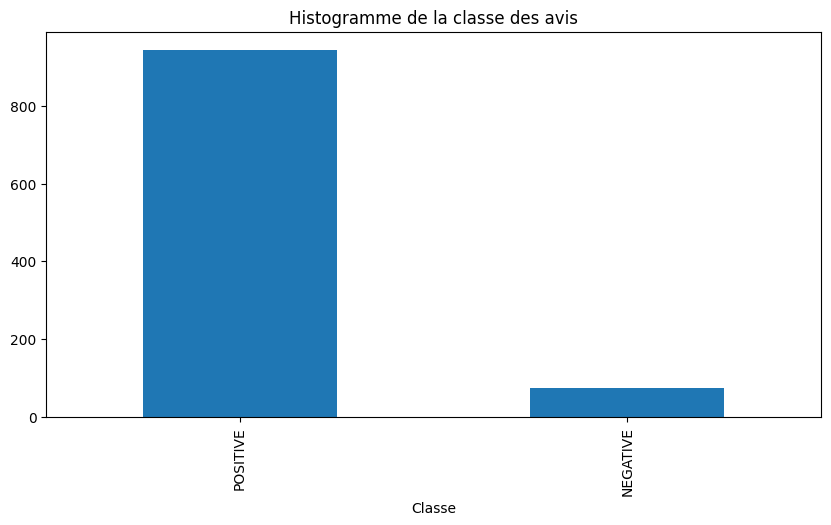

In [ ]:
df['Classe'].value_counts().plot(kind = 'bar', title = "Histogramme de la classe des avis",
                                 xlabel = 'Classe',
                                 figsize = (10, 5))
plt.show()

**Voir la distribution entre la prédiction des classes de notre transformers et puis le score réel affectés par l'internautes**

<Axes: title={'center': 'Relation entre Classe et Scores'}, xlabel='Classe', ylabel='Proportion des scores suivant la classe'>

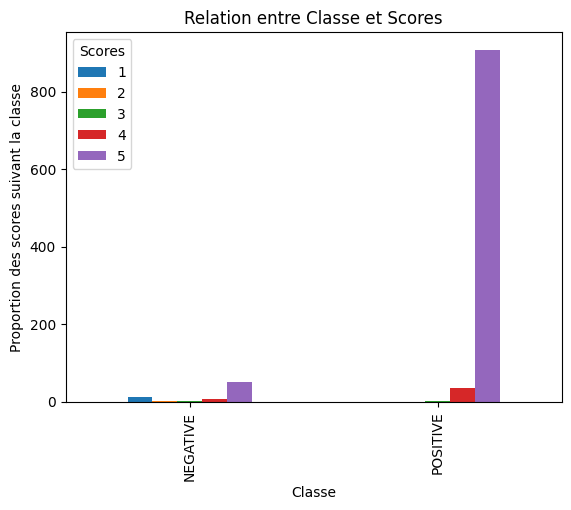

In [ ]:
# Grouper d'abord les deux colonnes cibles
df.groupby('Classe')['Scores'].value_counts().unstack().plot(kind = 'bar',
                                                             title = "Relation entre Classe et Scores",
                                                             xlabel = "Classe",
                                                             ylabel = "Proportion des scores suivant la classe")

In [ ]:
df.head()

,ID,Plateforme,Avis,Scores,Classe,Proportion_classe
0,RIPPLING1,rippling.com,Poor Customer Support AI - Great Person Suppor...,3,NEGATIVE,0.999676
1,RIPPLING2,rippling.com,I am having trouble signing upI am having trou...,1,NEGATIVE,0.999270
2,RIPPLING3,rippling.com,Rippling makes my daily work day easierRipplin...,5,POSITIVE,0.996991
3,RIPPLING4,rippling.com,"Rippling, Payroll, PEO and Devices and moreWe ...",5,POSITIVE,0.996672
4,RIPPLING5,rippling.com,Choosing a health plan can be easyChoosing a h...,5,POSITIVE,0.999333


**IDENTIFICATION DES POINTS FORTS ET DES FAIBLESSES DE LA PLATEFORME DEEL SELON LES AVIS DES CLIENTS**

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
#Créer de nouvelles jeux de données
reviews_positive = df[df['Classe'] == "POSITIVE"] # Avis positive
reviews_negative = df[df['Classe'] == "NEGATIVE"] # Avis negative

In [ ]:
# Trier
trie_reviews_positive = reviews_positive.sort_values(by = "Proportion_classe", ascending = False)
trie_reviews_negative = reviews_negative.sort_values(by = "Proportion_classe", ascending = False)

In [ ]:
# Les avis positifs
sorted_reviews_positive = trie_reviews_positive['Avis']

# Créer un DataFrame avec les avis triés
sorted_reviews_positive_df = pd.DataFrame(sorted_reviews_positive, columns=['Avis'])


In [ ]:
# Les avis negative
sorted_reviews_negative = trie_reviews_negative['Avis']

# Créer un DataFrame avec les avis triés
sorted_reviews_negative_df = pd.DataFrame(sorted_reviews_negative, columns=['Avis'])


In [ ]:
# Réinitialiser les index
sorted_reviews_positive_df.reset_index(drop=True, inplace=True)
sorted_reviews_positive_df.head()

,Avis
0,Rippling is wonderful!My experience with Rippl...
1,Rippling is great!Rippling is great! Excellent...
2,"Great resource, great responsive customer serv..."
3,Rippling Is AwesomeRippling is super easy to n...
4,Nice and smooth process of benefit…Nice and sm...


In [ ]:
# Réinitialiser les index
sorted_reviews_negative_df.reset_index(drop=True, inplace=True)
sorted_reviews_negative_df.head()

,Avis
0,Consider carefully before signing upThe platfo...
1,Poor Customer Support AI - Great Person Suppor...
2,W.T.F. Federal tax crap company.My wife's com...
3,Bait and SwitchSo I was contacted via LinkedIn...
4,Everything was easy to navigateEverything was ...


In [ ]:
# Afficher le premier avis positifs
exemple = sorted_reviews_positive_df['Avis'][0]
exemple


'Rippling is wonderful!My experience with Rippling has been wonderful! The user interface is amazing and the support is wonderful. The way rippling shows the items you need to do in a clear and concise checklist is awesome. Also the icon format makes it very simple to find what you need.Date of experience: November 07, 2022'

In [ ]:
# Afficher le premier avis negatif
exemple2 = sorted_reviews_negative_df['Avis'][0]
exemple2


"Consider carefully before signing upThe platform is not scalable for any growing company.  We've been told repeatedly that certain features exist, or function in a particular way, that don't.  The platform is not especially stable, especially when it comes to deductions.  It's too rigid and inflexible, not customizable at all, and both our customer service and implementation experience have not been good.  We have been with this platform for over a year, and it's still not a good experience.  There is very poor release management so menus and occasionally, actual features, change with little or no warning.  It might be fine for small, slow growing or no growing companies but if you are growing fast and scaling rapidly, find a different tool.  Reporting is not good.  They claim customizable reporting, but the output of the reports is highly unpredictable and often not usable. Most out of the box reports are not especially useful.Date of experience: October 19, 2021"

In [ ]:
# Voyons les 20 premiers commentaires positifs
nmbre_commentaires = 20

for i in range(nmbre_commentaires):
  print(sorted_reviews_positive_df['Avis'][i])

Rippling is wonderful!My experience with Rippling has been wonderful! The user interface is amazing and the support is wonderful. The way rippling shows the items you need to do in a clear and concise checklist is awesome. Also the icon format makes it very simple to find what you need.Date of experience: November 07, 2022
Rippling is great!Rippling is great! Excellent all-in-one HR platform. Highly recommend it.Date of experience: January 20, 2022
Great resource, great responsive customer service!!Thank you for the great service you provide, I have enjoyed the level of responsiveness you always provide.  Thank you for your great work and friendly staff.Date of experience: December 20, 2021
Rippling Is AwesomeRippling is super easy to navigate and everything is explained in a manner that is easy to digest. The options to choose from are great. Wonderful experience!Date of experience: September 22, 2022
Nice and smooth process of benefit…Nice and smooth process of benefit enrollment. Lo

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=7ad58a55f108c411ed2e0223b2a08c1aae7b2f16ef149823e397aee39c11c0b9
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

# **LES COMMENTAIRES DES INTERNAUTES: AVIS POSITIFS ET AVIS NEGATIFS**

**10 MEILLEURES AVIS POSITIVE TRADUITE EN FRANCAIS**

In [ ]:
from googletrans import Translator

# Initialiser le traducteur
translator = Translator()

# Nombre de commentaires à traduire
nombre_commentaires = 20

# Traduire et afficher les 20 premiers commentaires
for i in range(nombre_commentaires):
    commentaire = sorted_reviews_positive_df['Avis'][i]
    translation = translator.translate(commentaire, src='en', dest='fr')
    print(translation.text)


L'ondulation est merveilleuse! Mon expérience avec l'ondulation a été merveilleuse!L'interface utilisateur est incroyable et le support est merveilleux.La façon dont l'ondulation montre les éléments que vous devez faire dans une liste de contrôle claire et concise est géniale.Le format icône rend également très simple à trouver ce dont vous avez besoin. Date d'expérience: 07 novembre 2022
L'ondulation est géniale! L'ondage est génial!Excellente plate-forme RH tout-en-un.Je le recommande vivement. Date d'expérience: 20 janvier 2022
Excellente ressource, excellent service client réactif !! Merci pour l'excellent service que vous fournissez, j'ai apprécié le niveau de réactivité que vous fournissez toujours.Merci pour votre excellent travail et votre personnel amical. Date d'expérience: 20 décembre 2021
L'ondage est génial est super facile à naviguer et tout est expliqué d'une manière facile à digérer.Les options à choisir sont excellentes.Expérience merveilleuse! Date d'expérience: 22 se

**10 MEILLEURE AVIS NEGATIVE TRADUITE EN FRANCAIS**

In [ ]:
from googletrans import Translator

# Initialiser le traducteur
translator = Translator()

# Nombre de commentaires à traduire
nombre_commentaires = 20

# Traduire et afficher les 20 premiers commentaires
for i in range(nombre_commentaires):
    commentaire = sorted_reviews_negative_df['Avis'][i]
    translation = translator.translate(commentaire, src='en', dest='fr')
    print(translation.text)


Considérez attentivement avant de signer la plate-forme n'est pas évolutive pour une entreprise en pleine croissance.On nous a dit à plusieurs reprises que certaines fonctionnalités existent, ou fonctionnent d'une manière particulière, ce qui ne le fait pas.La plate-forme n'est pas particulièrement stable, surtout en ce qui concerne les déductions.C'est trop rigide et inflexible, pas personnalisable du tout, et notre service client et notre expérience de mise en œuvre n'ont pas été bons.Nous sommes avec cette plate-forme depuis plus d'un an, et ce n'est toujours pas une bonne expérience.Il y a une très mauvaise gestion de la libération, donc les menus et parfois, des caractéristiques réelles, changent avec peu ou pas d'avertissement.Cela pourrait être bien pour les petites entreprises en croissance lente ou pas en croissance, mais si vous vous développez rapidement et que vous évoluez rapidement, trouvez un outil différent.Le rapport n'est pas bon.Ils revendiquent des rapports personna

**RECOMMANDATION**